In [1]:
import pandas as pd
import seaborn as sns
from scipy.stats import wasserstein_distance
sns.set_theme(style="ticks")

In [2]:
#Load CSV file in a dataframe
df = pd.read_csv('./data/satgpa.csv')
df = df.drop(columns = ['sat_sum'])
dfsynth = pd.read_csv('./minutemen/Data/raw_synthetic.csv')

In [3]:
df.head()

,sex,sat_v,sat_m,hs_gpa,fy_gpa
0,1,65,62,3.40,3.18
1,2,58,64,4.00,3.33
2,2,56,60,3.75,3.25
3,1,42,53,3.75,2.42
4,1,55,52,4.00,2.63


# Visual inspection

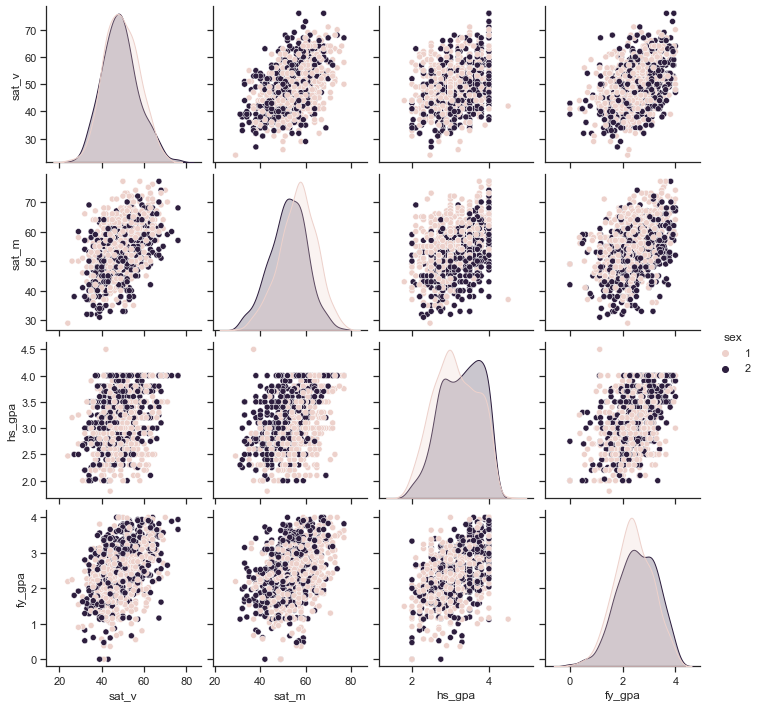

In [4]:
sns.pairplot(df, hue = "sex")

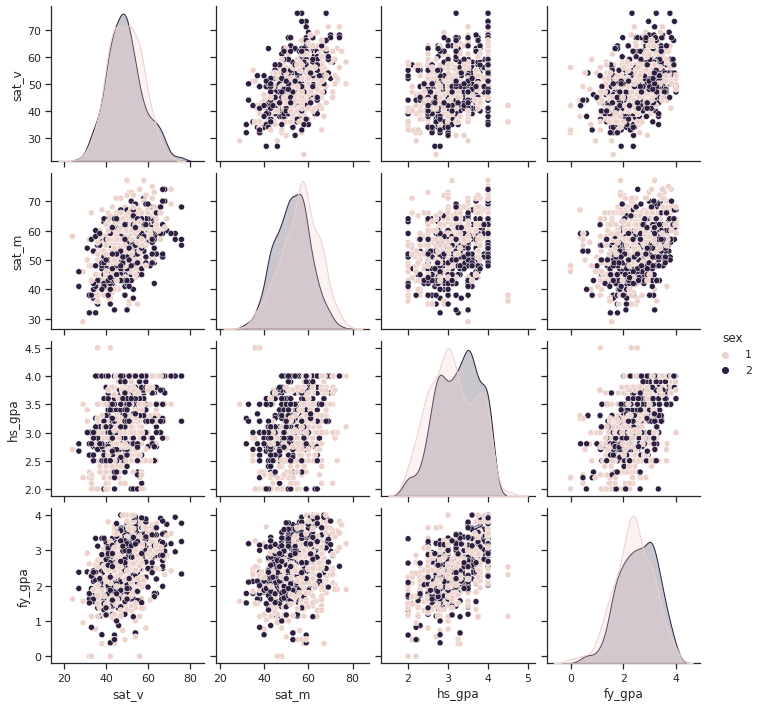

In [38]:
sns.pairplot(dfsynth, hue = "sex")

In [5]:

print(f"Distance between sex is {wasserstein_distance(df['sex'].tolist(), dfsynth['sex'].tolist()):.3f}")
print(f"Distance between sat_v is {wasserstein_distance(df['sat_v'].tolist(), dfsynth['sat_v'].tolist()):.3f}")
print(f"Distance between sat_m is {wasserstein_distance(df['sat_m'].tolist(), dfsynth['sat_m'].tolist()):.3f}")
#print(f"Distance between sat_sum is {wasserstein_distance(df['sat_sum'].tolist(), dfsynth['sat_sum'].tolist()):.3f}")
print(f"Distance between hs_gpa is {wasserstein_distance(df['hs_gpa'].tolist(), dfsynth['hs_gpa'].tolist()):.3f}")
print(f"Distance between fy_gpa is {wasserstein_distance(df['fy_gpa'].tolist(), dfsynth['fy_gpa'].tolist()):.3f}")

Distance between sex is 0.055
Distance between sat_v is 2.652
Distance between sat_m is 2.037
Distance between hs_gpa is 0.094
Distance between fy_gpa is 0.249


### Comparing conditonal distributions

In [6]:
dfc = df[df['sex'] == 1]
dfsynthc = dfsynth[dfsynth['sex'] == 1]

print(f"Distance between sex is {wasserstein_distance(dfc['sex'].tolist(), dfsynthc['sex'].tolist()):.3f}")
print(f"Distance between sat_v is {wasserstein_distance(dfc['sat_v'].tolist(), dfsynthc['sat_v'].tolist()):.3f}")
print(f"Distance between sat_m is {wasserstein_distance(dfc['sat_m'].tolist(), dfsynthc['sat_m'].tolist()):.3f}")
#print(f"Distance between sat_sum is {wasserstein_distance(dfc['sat_sum'].tolist(), dfsynthc['sat_sum'].tolist()):.3f}")
print(f"Distance between hs_gpa is {wasserstein_distance(dfc['hs_gpa'].tolist(), dfsynthc['hs_gpa'].tolist()):.3f}")
print(f"Distance between fy_gpa is {wasserstein_distance(dfc['fy_gpa'].tolist(), dfsynthc['fy_gpa'].tolist()):.3f}")

Distance between sex is 0.000
Distance between sat_v is 3.054
Distance between sat_m is 2.185
Distance between hs_gpa is 0.107
Distance between fy_gpa is 0.238


In [41]:
dfc = df[df['sex'] == 2]
dfsynthc = dfsynth[dfsynth['sex'] == 2]

print(f"Distance between sex is {wasserstein_distance(dfc['sex'].tolist(), dfsynthc['sex'].tolist()):.3f}")
print(f"Distance between sat_v is {wasserstein_distance(dfc['sat_v'].tolist(), dfsynthc['sat_v'].tolist()):.3f}")
print(f"Distance between sat_m is {wasserstein_distance(dfc['sat_m'].tolist(), dfsynthc['sat_m'].tolist()):.3f}")
#print(f"Distance between sat_sum is {wasserstein_distance(dfc['sat_sum'].tolist(), dfsynthc['sat_sum'].tolist()):.3f}")
print(f"Distance between hs_gpa is {wasserstein_distance(dfc['hs_gpa'].tolist(), dfsynthc['hs_gpa'].tolist()):.3f}")
print(f"Distance between fy_gpa is {wasserstein_distance(dfc['fy_gpa'].tolist(), dfsynthc['fy_gpa'].tolist()):.3f}")

Distance between sex is 0.000
Distance between sat_v is 0.513
Distance between sat_m is 0.522
Distance between hs_gpa is 0.028
Distance between fy_gpa is 0.037


## Are there any entries that are the same in both datasets?

In [7]:
df[df.duplicated(keep=False)]

dfsynth[dfsynth.duplicated(keep=False)]

,sex,sat_v,sat_m,sat_sum,hs_gpa,fy_gpa


In [8]:
df1 = df
df_merge = pd.merge(df1, dfsynth, on=[1,2,3,4,5], how='inner')
df1 = df1.append(df_merge) 

#df1['Duplicated'] = df1.duplicated(keep=False) # keep=False marks the duplicated row with a True
#df_final = df1[~df1['Duplicated']] # selects only rows which are not duplicated.
#del df_final['Duplicated'] # delete the indicator column

KeyError: 1

In [9]:
dfsynth


,sex,sat_v,sat_m,sat_sum,hs_gpa,fy_gpa
0,2,35,51,88,4.00,1.8
1,2,37,34,93,3.25,2.2
2,1,41,64,85,2.25,2.2
3,2,43,52,72,4.00,1.8
4,2,45,66,130,2.75,1.8
...,...,...,...,...,...,...
1007,2,42,63,71,3.20,1.8
1008,2,52,52,82,3.75,3.0
1009,2,41,52,95,2.80,2.2
1010,2,52,39,80,3.75,1.4
